In [1]:
# Colab Notebook: MLP Stage 2 Setup

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Navigate to project directory
%cd /content/drive/MyDrive/ECS189/ECS189G-Project

/content/drive/MyDrive/ECS189/ECS189G-Project


In [3]:
# Add code directories to Python path
import sys
sys.path.append('/content/drive/MyDrive/ECS189/ECS189G-Project/local_code')
sys.path.append('/content/drive/MyDrive/ECS189/ECS189G-Project/local_code/stage_2_code')


In [4]:
#  Install required libraries
!pip install torch torchvision scikit-learn matplotlib

In [5]:
# Imports
from stage_2_code.Dataset_Loader import Dataset_Loader
from stage_2_code.Method_MLP import Method_MLP
from stage_2_code.Evaluate_Accuracy import Evaluate_Accuracy
from stage_2_code.Result_Saver import Result_Saver
from stage_2_code.Result_Loader import Result_Loader

In [6]:
# Load Data
loader = Dataset_Loader('mlp_dataset', 'MNIST-style digits')
loader.dataset_source_folder_path = 'script/stage_2_script/'  # where train.csv and test.csv are located
data = loader.load()

loading data for stage 2...


In [7]:

model = Method_MLP("MLP", "Multilayer Perceptron for digit classification")
model.data = data  # <-- correct way to pass in dataset
results = model.run()

method running...
--start training...
evaluating performance...
evaluating performance...
Epoch: 0 Accuracy: 0.09503333333333333 Loss: 2.322370767593384
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating performance...
evaluating perf

In [8]:
evaluator = Evaluate_Accuracy("accuracy")
evaluator.data = results  # 'results' comes from model.run()
evaluator.evaluate()

evaluating performance...


0.9773

In [9]:


# Plot Learning Curve (add training loss/accuracy recording to Method_MLP.py)
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
true_y = data['test']['y']
pred_y = results['pred_y']

acc = accuracy_score(true_y, pred_y)
prec = precision_score(true_y, pred_y, average='macro')
rec = recall_score(true_y, pred_y, average='macro')
f1 = f1_score(true_y, pred_y, average='macro')

print(f"Accuracy: {acc:.4f}")
print(f"Precision (macro): {prec:.4f}")
print(f"Recall (macro): {rec:.4f}")
print(f"F1 Score (macro): {f1:.4f}")

#
# plt.plot(train_losses, label='Training Loss')
# plt.plot(train_accuracies, label='Training Accuracy')
# plt.legend()
# plt.title("Learning Curve")
# plt.xlabel("Epoch")
# plt.ylabel("Metric")
# plt.show()


Accuracy: 0.9773
Precision (macro): 0.9771
Recall (macro): 0.9771
F1 Score (macro): 0.9771


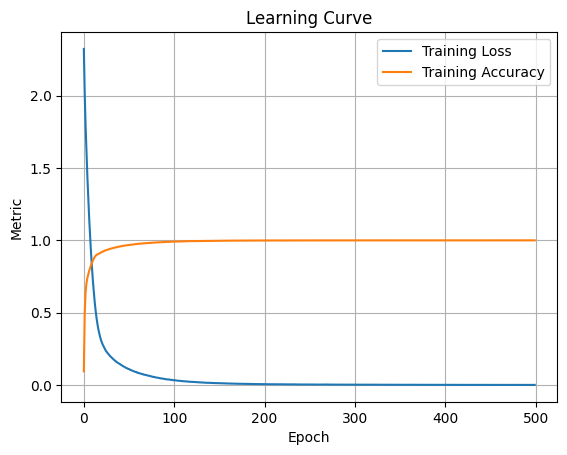

In [10]:
# Plot Learning Curve
import matplotlib.pyplot as plt

train_losses = results['train_losses']
train_accuracies = results['train_accuracies']

plt.plot(train_losses, label='Training Loss')
plt.plot(train_accuracies, label='Training Accuracy')
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.grid(True)
plt.show()